In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score

In [3]:
# Import the input dataset
tracks_path = 'Resources/pre_spotify_target_artists.csv'
tracks_df = pd.read_csv(tracks_path)
tracks_df.head()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
0,0.34,0.045291,0.0,0.545455,0.8,0.000041,0.0,0.0,0.628658,0.599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.43,0.032864,0.0,0.181818,0.8,0.000230,0.0,0.0,0.629667,0.766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.16,0.040952,0.0,0.636364,0.8,0.000066,0.0,0.0,0.577195,0.608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.32,0.031660,0.0,0.181818,0.8,0.006968,1.0,0.0,0.258325,0.895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.35,0.041927,0.0,0.363636,0.6,0.000201,0.0,0.0,0.624622,0.518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# Remove loan status target from features data
y = tracks_df.artist_popularity
X = tracks_df.drop(columns=["artist_popularity"])
X.shape, y.shape

((625676, 29), (625676,))

In [5]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Constant Feature Removal

In [6]:
# Fit the constant feature removal
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [7]:
# Get the number of features 
constant_filter.get_support().sum()

29

In [8]:
# Create a constant filter list
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [9]:
# Determine the number of X columns 
X.columns[constant_list]

Index([], dtype='object')

In [10]:
# Transform the constant filter on X_train and X_test 
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

## Quasi constant feature removal

In [11]:
# Train the quasi constant feature removal
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [12]:
# Fit the quasi constant feature removal
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [13]:
# get the number of features after filtering
quasi_constant_filter.get_support().sum()

15

In [14]:
# The number of filtered features
29-15

14

In [15]:
# Transform the quasi constant feature removal on X_train_filter and X_test_filter
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [16]:
# Determine the shape of filtered X
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((469257, 15), (156419, 15))

## Remove Duplicate Features

In [17]:
# Transform X_train and X_test
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [18]:
# Determine the type of X_train_T
type(X_train_T)

numpy.ndarray

In [19]:
# Create dataframe for X_train_T and X_test_T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [20]:
# Determine the shape of X_train_T and X_test_T
X_train_T.shape, X_test_T.shape

((15, 469257), (15, 156419))

In [21]:
# Count the duplicates in X_train and add them 
# X_train_T.duplicated().sum()
# The number of duplicates is 0

In [22]:
# Assign a variable for duplicate features
# duplicated_features = X_train_T.duplicated()
# duplicated_features

In [23]:
# Keep the features after removing duplicates
# features_to_keep = [not index for index in duplicated_features]

In [24]:
# Update X_train and X_test
# X_train_unique = X_train_T[features_to_keep].T
# X_test_unique = X_test_T[features_to_keep].T

In [25]:
# Keep the X_train_unique and X_test_unique without any duplicates
X_train_unique = X_train_quasi_filter
X_test_unique = X_test_quasi_filter

In [26]:
# Determine X_train_unique and X_train_unique shape
X_train_unique.shape, X_train.shape

((469257, 15), (469257, 29))

## Random Forest Model and compare the performance of the selected feature

In [27]:
# Define a function for running Random Forest
def run_randomForest(X_train, X_test, y_train, y_test ):
    
    # Triain the model
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Prediction
    y_pred = model.predict(X_test)
    
    print('Accuracy Score:')
    print(accuracy_score(y_test, y_pred))
    

In [28]:
# Apply the Random Forest on the original split training/test dataset
%%time
run_randomForest(X_train, X_test, y_train, y_test )

Accuracy Score:
0.9419827514560252
Wall time: 1min 23s


In [29]:
# Apply the Random Forest on the split training/test dataset after feature selection
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test )

Accuracy Score:
0.7421604792256695
Wall time: 1min 25s


The performance of the model is less than that without feature removal.



## Feature Selection with Filtering-Correlated Features

In [30]:
# check the correllation of X_train in ascending order
X_train.corr().iloc[0].sort_values(ascending=True)

acousticness               -0.336437
instrumentalness           -0.219523
liveness                   -0.044723
speechiness                -0.042173
genres_classic bollywood   -0.034803
mode                       -0.033247
genres_other               -0.016327
genres_filmi               -0.012714
genres_classical era       -0.009490
genres_vintage tango       -0.007990
genres_classical           -0.001837
genres_tango               -0.000337
artist_frequency            0.000699
genres_sufi                 0.001464
valence                     0.008336
key                         0.013868
genres_desi pop             0.014517
genres_hoerspiel            0.031821
duration_ms                 0.032101
tempo                       0.064289
time_signature              0.081880
unique_playlists            0.098876
explicit                    0.176173
danceability                0.176329
followers                   0.204063
energy                      0.275251
loudness                    0.296584
Y

<AxesSubplot:>

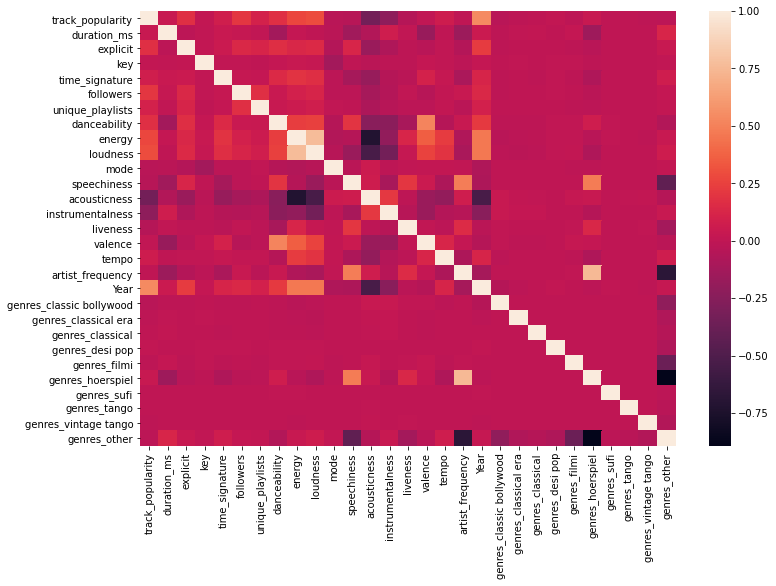

In [31]:
# Create a matrix correlation for X_train
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr())

In [32]:
# Craete a dataframe for X_train_unique 
X_train_unique = pd.DataFrame(X_train_unique)
X_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.0,0.090909,0.655903,0.327,1.0,0.068074,0.987952,0.673000,0.1310,0.788,0.434741,0.396694,0.0,1.0
1,0.14,0.0,0.363636,0.711403,0.199,0.0,0.030381,0.809237,0.046000,0.2610,0.460,0.354309,0.793388,0.0,1.0
2,0.30,0.0,0.272727,0.552977,0.168,1.0,0.028939,0.830321,0.000001,0.1500,0.516,0.345027,0.553719,0.0,1.0
3,0.09,0.0,0.636364,0.524723,0.926,1.0,0.059938,0.000016,0.813000,0.2130,0.648,0.535930,0.925620,0.0,1.0
4,0.11,0.0,0.454545,0.685166,0.439,1.0,0.050875,0.840361,0.008330,0.0591,0.685,0.544932,0.487603,0.0,1.0


In [33]:
# Craete a dataframe for X_test_unique 
X_test_unique = pd.DataFrame(X_test_unique)
X_test_unique.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.03,0.0,0.363636,0.623613,0.228,1.0,0.035839,0.709839,0.000005,0.1120,0.772,0.384973,0.694215,0.0,1.0
1,0.20,0.0,0.454545,0.432896,0.410,1.0,0.043151,0.617470,0.000000,0.2270,0.828,0.599117,0.479339,0.0,1.0
2,0.36,0.0,0.363636,0.519677,0.709,1.0,0.031102,0.302209,0.000147,0.1520,0.844,0.615133,0.586777,0.0,1.0
3,0.03,0.0,0.636364,0.434914,0.847,1.0,0.060144,0.498996,0.042300,0.0835,0.493,0.563185,0.438017,0.0,1.0
4,0.06,0.0,0.454545,0.385469,0.334,1.0,0.029866,0.316265,0.000174,0.1680,0.474,0.727682,0.727273,0.0,1.0


<AxesSubplot:>

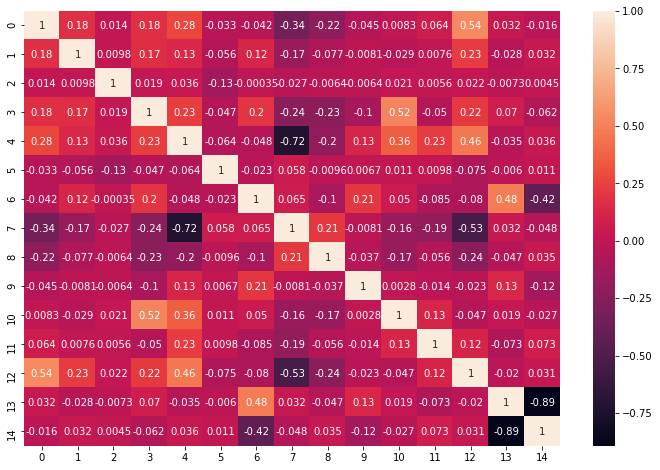

In [34]:
# Create a matrix correlation for X_train_unique
plt.figure(figsize=(12,8))
sns.heatmap(X_train_unique.corr(), annot=True)

In [35]:
# Define a function to return the correlated columns 
def get_correlation(tracks_df, threshold):
    corr_col = set()
    corrmat = tracks_df.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
                
    return corr_col    

In [36]:
# Determine the number of correlated features
corr_features = get_correlation(X_train_unique, 0.7)
print(len(corr_features))

2


In [37]:
# Drop the correlated features
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis =1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis =1)

In [38]:
# Determine the sahpe of Uncorrelated X_train and X_test
X_train_uncorr.shape, X_test_uncorr.shape 

((469257, 13), (156419, 13))

In [39]:
# Apply the Random Forest on the split training/test dataset after Filtering-Correlated Features
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test )

Accuracy Score:
0.7382159456332031
Wall time: 1min 33s


In [40]:
# Apply the Random Forest on the original split training/test dataset
%%time
run_randomForest(X_train, X_test, y_train, y_test )

Accuracy Score:
0.9419827514560252
Wall time: 1min 36s


## Results
Constant Feature Removal and Quasi constant feature removal were applied to the x_train to reduce the dimensionality but the results obtained from the Random Forest Classifier show that although the wall time is reduced, the accuracy score of the model is reduced. 